# The Perceptron

TT
#### First Neural Network! (back to 1950's)
* inspired by actual neurons
* artificial neuron

#### Supervised learning
* Classification

Ex. irisdata: classify setosa versus virginica using sepal length and sepal width
    * Given\[sepal width, sepal length\], we want to predict 1 or -1, corresponding to the correct species.
    
Check the notes on iPad.

---
# The Perceptron Learning Algorithm
## Iris Species Binary Classification

In this notebook we implement the *perceptron learning algorithm* for binary species classification using the [iris dataset](http://en,wikepedia.org/wiki/Iris_flower_data_set).

The perceptron was first implemented by...(give the description of algo here!)

### Task

Our task will be to classify setosa and versicolor species using two feature measures, such as sepal length and sepal width. In order to do this we will need the following libraries:

* [matplotlib](http://metplotlib.org)
* [pandas](http://pandas.pydata.org)

... (add the others here!)

---

In [4]:
# import the necessaty libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# import datasets from sklearn which contains the iris data
from sklearn import datasets

# load the iris data (specifying type as data frames)
iris = datasets.load_iris(as_frame=True)

---

Describe what the object iris is and tell the reader how to extract useful information for our task


In the following code cell we extract our data to numpy arrays.

---

In [12]:
# TT
iris
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [18]:
# Species to desired label dictionary
label_dict = {iris['target_names'][0] : 1.0, iris['target_names'][1] : -1.0}

# Extract out desired features from iris
X = iris['data'][['sepal length (cm)', 'sepal width (cm)']].iloc[:100]

# Covert features to numpy array, give explaination of the features here!
X = X.to_numpy()

# Extract out labels
y = iris['target'].iloc[:100]

# Convert labels to numpy array
y = y.to_numpy()

# Change labels to match our desired 1 or -1 labels
for i, label in enumerate(y):
    if label == 0.0:
        y[i] = 1.0
    elif label == 1.0:
        y[i] = -1.0

In [29]:
# Below we hack away and make our desired X_bar, there should be a better way to append 1 vector here!
X_bar = []
for x in X:
    X_bar.append(np.append(x, np.ones(1)))
X_bar = np.array(X_bar)
X_bar

array([[5.1, 3.5, 1. ],
       [4.9, 3. , 1. ],
       [4.7, 3.2, 1. ],
       [4.6, 3.1, 1. ],
       [5. , 3.6, 1. ],
       [5.4, 3.9, 1. ],
       [4.6, 3.4, 1. ],
       [5. , 3.4, 1. ],
       [4.4, 2.9, 1. ],
       [4.9, 3.1, 1. ],
       [5.4, 3.7, 1. ],
       [4.8, 3.4, 1. ],
       [4.8, 3. , 1. ],
       [4.3, 3. , 1. ],
       [5.8, 4. , 1. ],
       [5.7, 4.4, 1. ],
       [5.4, 3.9, 1. ],
       [5.1, 3.5, 1. ],
       [5.7, 3.8, 1. ],
       [5.1, 3.8, 1. ],
       [5.4, 3.4, 1. ],
       [5.1, 3.7, 1. ],
       [4.6, 3.6, 1. ],
       [5.1, 3.3, 1. ],
       [4.8, 3.4, 1. ],
       [5. , 3. , 1. ],
       [5. , 3.4, 1. ],
       [5.2, 3.5, 1. ],
       [5.2, 3.4, 1. ],
       [4.7, 3.2, 1. ],
       [4.8, 3.1, 1. ],
       [5.4, 3.4, 1. ],
       [5.2, 4.1, 1. ],
       [5.5, 4.2, 1. ],
       [4.9, 3.1, 1. ],
       [5. , 3.2, 1. ],
       [5.5, 3.5, 1. ],
       [4.9, 3.6, 1. ],
       [4.4, 3. , 1. ],
       [5.1, 3.4, 1. ],
       [5. , 3.5, 1. ],
       [4.5, 2.3

---

### Visualization of Data

Explain why visualization is import and maybe discuss how in the below figure we can clearly see a seperating line...

---

Text(0.5, 1.0, 'Iris Data Plot')

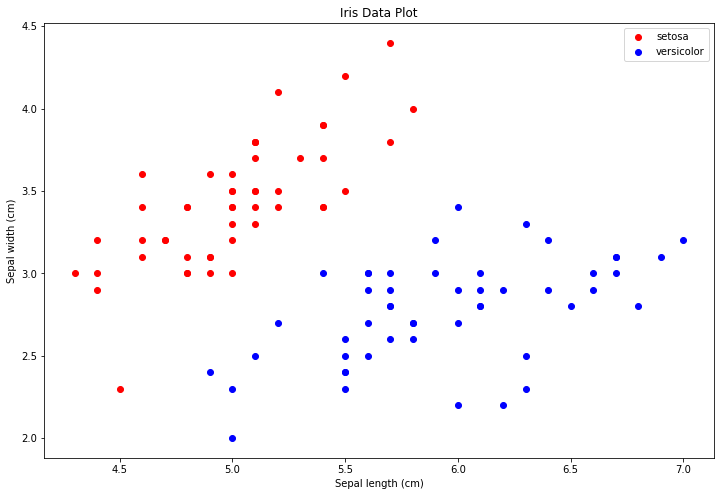

In [31]:
plt.figure(figsize = (12, 8))
plt.scatter(X_bar[:50, 0],
            X_bar[:50, 1],
            label = 'setosa', 
            color = 'r')

plt.scatter(X_bar[50:, 0],
            X_bar[50:, 1], 
            label = 'versicolor', 
            color = 'b')

plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.legend()
plt.title("Iris Data Plot")

---

Insert hear a image of the perceptron drawn sa a neuron...

How the algorithm works...

(LaTex code here)

$
\hat y^i = \text{sign}(w^T\bar x^i)
$

We obviously need our activation function, the sign function, so we define this function in the following code cell.

---

In [34]:
def sign(x, y):
    # the input vectors here should be numpy arrays
    if x @ y > 0 :
        return 1.0
    else:
        return -1.0
    
def L(w, features = X_bar, labels = y):
    return sum(.5*(sign(w, x) - labels[i])**2 for i, x in enumerate(features))    

---

### The Gradient Approximation Update Rule

Explain why this rule works!

$
w \rightarrow w - \alpha (\hat y^i - y^i) \bar x^i
$

---

In [44]:
def grad_approx(w, x, y):
    return (sign(w, x) - y)*x

# set epochs
epochs = 1000

# set alpha
alpha = .5

# random intial weights
w = np.random.rand(3)

In [38]:
# 
print(f"The Loss before implementing stochastic approx gradient descent = {L(w)}")

The Loss before implementing stochastic approx gradient descent = 100.0


In [47]:
losses = []
for _ in range(epochs):
    for _ in range(70):
        random_index = np.random.randint(100)
        w = w - alpha*grad_approx(w, X_bar[random_index], y[random_index])
    losses.append(L(w))

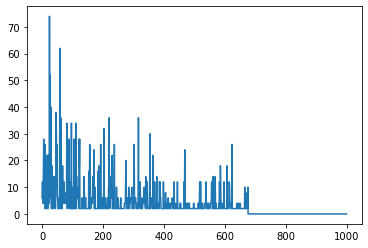

In [48]:
plt.plot(losses)

Text(0.5, 1.0, 'Iris Data Plot')

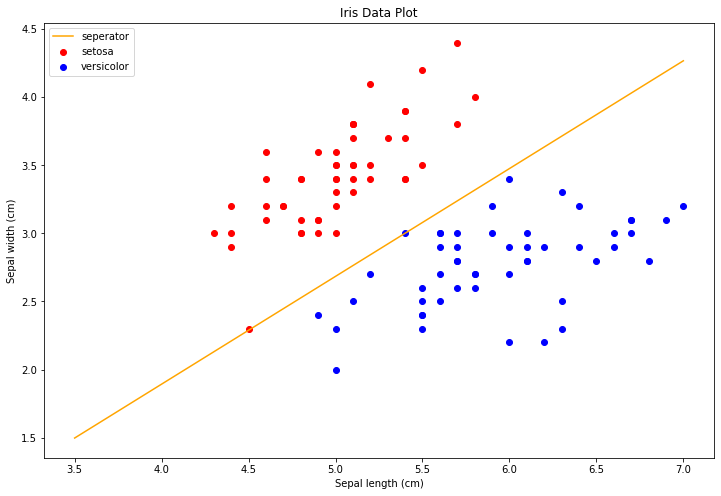

In [50]:
domain = np.arange(3.5, 7.5, .5)
line = [(w[0]*x + w[2])/-w[1] for x in domain]

plt.figure(figsize = (12, 8))
plt.scatter(X_bar[:50, 0],
            X_bar[:50, 1],
            label = 'setosa', 
            color = 'r')

plt.scatter(X_bar[50:, 0],
            X_bar[50:, 1], 
            label = 'versicolor', 
            color = 'b')
plt.plot(domain,
        line,
        label = 'seperator',
        color = 'orange')

plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.legend()
plt.title("Iris Data Plot")

In [40]:
np.random.randint(100)

81

In [21]:
X[0]

array([5.1, 3.5])

In [8]:
iris['data']

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
iris['target']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [5]:
X.to_numpy()

NameError: name 'X' is not defined